# Evaluation Project - 4
Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
plant=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
plant.shape

(907, 27)

In [5]:
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

###### Observe: NULL values are present and there are 12 object and 15 float values are present,And total 27 columns and 908 enteries are present in the given Data Set

# Checking for unique values

In [6]:
plant.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

# check for null values

In [7]:
plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

observe:- other_fuel2,other_fuel3,wepp_id,generation_gwh_2013,gwt2019 and estimated_generation_gwt have no data so it is better to drop

# statistical summary

In [8]:
plant.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

##### observe:-
    1.Categorical-Column==country,country_long,name,gpp_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
    
    2.continuous-column==capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,geration_gwh_2013 to generation_gwh_2019 and estimated_generation_gwh

In [9]:
plant.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


#### observe:
    from the above it is observe that columns like capacity_mw,gereration_gwh_2014,generation_gwh_2015,gereration_gwh_2016,generation_gwh_2017,generation_gwh_2018 may contains outlier since there is huge difference between 75% and max and there respective mean and 50% also are significantly different
    A higher std than mean in above columns indicate skewness

In [10]:
plant.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Droping Columns

In [11]:
plant.drop(columns=['other_fuel2','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],inplace=True)

In [12]:
plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# Dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [13]:
plant.drop(columns=['url','country','other_fuel1','country_long','name','gppd_idnr','owner'],inplace=True)

In [14]:
plant

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
plant.dtypes[plant.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [16]:
plant.dtypes[plant.dtypes == 'float'] #identifying the continuous columns

capacity_mw              float64
latitude                 float64
longitude                float64
commissioning_year       float64
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [17]:
plant.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [18]:
plant.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [19]:
plant.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [20]:
plant.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

# Dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [21]:
plant.drop(columns=['generation_data_source','source'],inplace=True)

In [22]:
plant

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for unique categories in the categorical columns with null values

In [23]:
plant.dtypes[plant.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
geolocation_source    object
dtype: object

In [24]:
plant.geolocation_source.isnull().sum()

19

In [25]:
plant.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

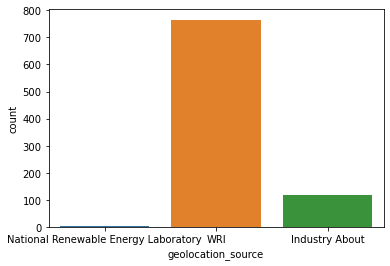

In [26]:
sns.countplot(plant.geolocation_source)

In [27]:
plant.geolocation_source.mode() # most frequently occuring value.

0    WRI
dtype: object

In [28]:
(plant['geolocation_source'] == 'WRI').sum()/plant.geolocation_source.count()*100 #checking the % share of most frequently occuring value.

86.14864864864865

 86.16% of geolocation_source data is 'WRI'.

# Therefore imputing ' WRI' to NaN values in geolocation_source column

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [31]:
si = si.fit(plant[['geolocation_source']])

In [32]:
plant[['geolocation_source']] = si.transform(plant[['geolocation_source']])

In [33]:
plant[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.


# Checking for Null values in continuous / discrete columns.

In [34]:
plant.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [35]:
plant.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [36]:
plant.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
902    77.3568
903    78.1654
904    75.5811
905    73.7477
906    77.4768
Name: longitude, Length: 907, dtype: float64

# Using KNN Imputation technique for imputing missing data.

In [37]:
from sklearn.impute import KNNImputer

In [38]:
imp = KNNImputer(n_neighbors=2)

In [39]:
plant[['latitude','longitude']] = imp.fit_transform(plant[['latitude','longitude']])

In [40]:
plant[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

# There are no more values missing from 'latitude' and 'longitude' columns.

In [41]:
plant.commissioning_year.isnull().sum()/908*100

41.85022026431718

 41.85% of commissioning_year is NaN

In [42]:
plant.commissioning_year.mode()

0    2015.0
dtype: float64

In [43]:
plant.commissioning_year.mode()

0    2015.0
dtype: float64

In [44]:
(plant['commissioning_year'] == 2013.0).sum()/plant.commissioning_year.count()*100 #checking the % share of most frequently occuring value.

4.743833017077799

In [45]:
plant.commissioning_year.mean()

1997.0910815939278

In [46]:
plant.commissioning_year.median()

2001.0

In [47]:
(plant['commissioning_year'] == 1996.0).sum()/plant.commissioning_year.count()*100 #checking the % share of mean year value.

2.4667931688804554

In [48]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['commissioning_year']])
plant[['commissioning_year']] = si.transform(plant[['commissioning_year']])
plant[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [49]:
plant.commissioning_year = plant.commissioning_year.astype('int64') #converting to int data type.

In [50]:
plant.commissioning_year

0      2011
1      2001
2      2001
3      2004
4      2015
       ... 
902    2016
903    2001
904    2001
905    2001
906    2001
Name: commissioning_year, Length: 907, dtype: int64

In [51]:
plant.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

# Dropping column year_of_capacity_data as all the values in it are '2019.0'

In [52]:
plant.drop(columns = 'year_of_capacity_data',inplace = True)

In [53]:
plant.shape

(907, 11)

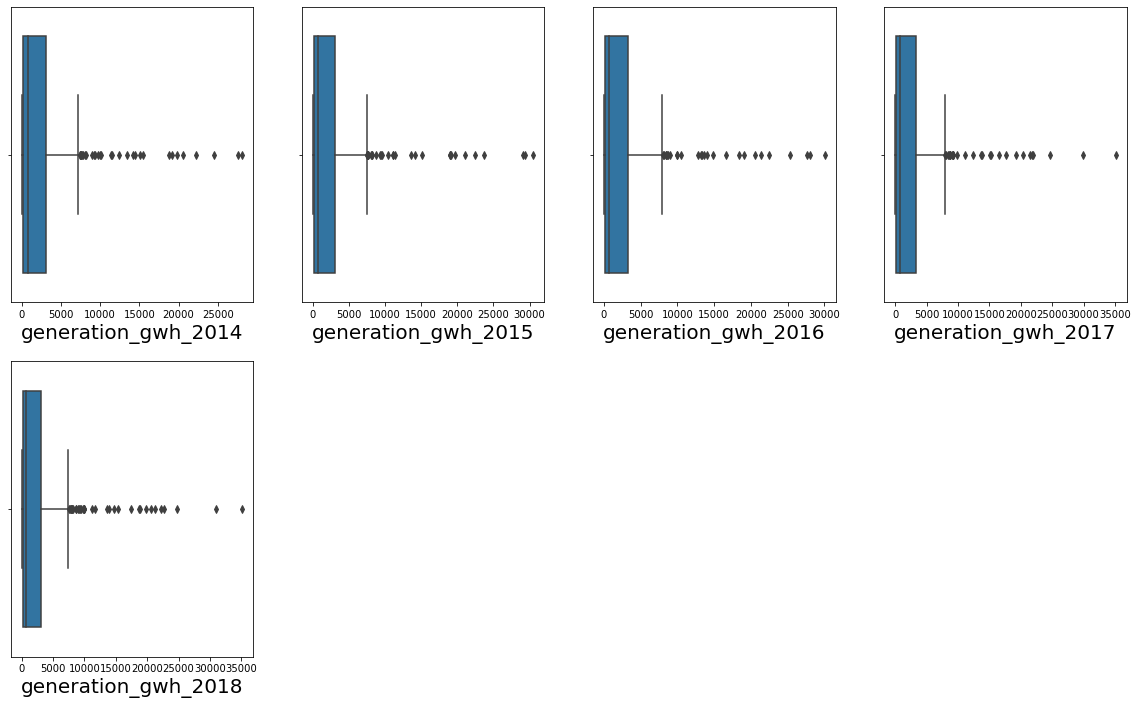

In [54]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 outliers exist, therefore imputing with KNN imputation technique.

In [55]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['generation_gwh_2014']])
plant[['generation_gwh_2014']] = si.transform(plant[['generation_gwh_2014']])
plant[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['generation_gwh_2015']])
plant[['generation_gwh_2015']] = si.transform(plant[['generation_gwh_2015']])
plant[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['generation_gwh_2016']])
plant[['generation_gwh_2016']] = si.transform(plant[['generation_gwh_2016']])
plant[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['generation_gwh_2017']])
plant[['generation_gwh_2017']] = si.transform(plant[['generation_gwh_2017']])
plant[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(plant[['generation_gwh_2018']])
plant[['generation_gwh_2018']] = si.transform(plant[['generation_gwh_2018']])
plant[['generation_gwh_2018']].isnull().sum()

generation_gwh_2018    0
dtype: int64

In [60]:
plant.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# There are no more null values in the dataframe.

### Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.¶

In [61]:
plant['Age'] = plant['commissioning_year'].apply(lambda y: 2021 - y)
plant.drop(columns=['commissioning_year'],inplace=True)
plant

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,10
1,98.0,24.7663,74.6090,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
2,39.2,21.9038,69.3732,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
3,135.0,23.8712,91.3602,Gas,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,17
4,1800.0,21.9603,82.4091,Coal,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,6
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,5
903,3.0,12.8932,78.1654,Solar,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,20
904,25.5,15.2758,75.5811,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
905,80.0,24.3500,73.7477,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20


# Analysing the continuous data type Target column

In [62]:
plant.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

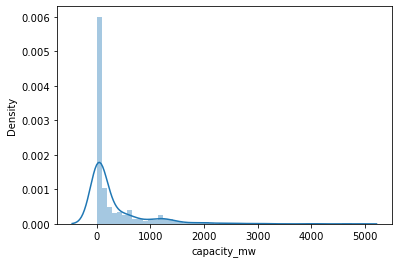

In [63]:
sns.distplot(plant.capacity_mw)

In [64]:
plant.select_dtypes(include = object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [65]:
plant.capacity_mw.skew()

3.123576153626497

 Distribution of data is right skewed.

# Analysing Feature columns with Continuous Data.

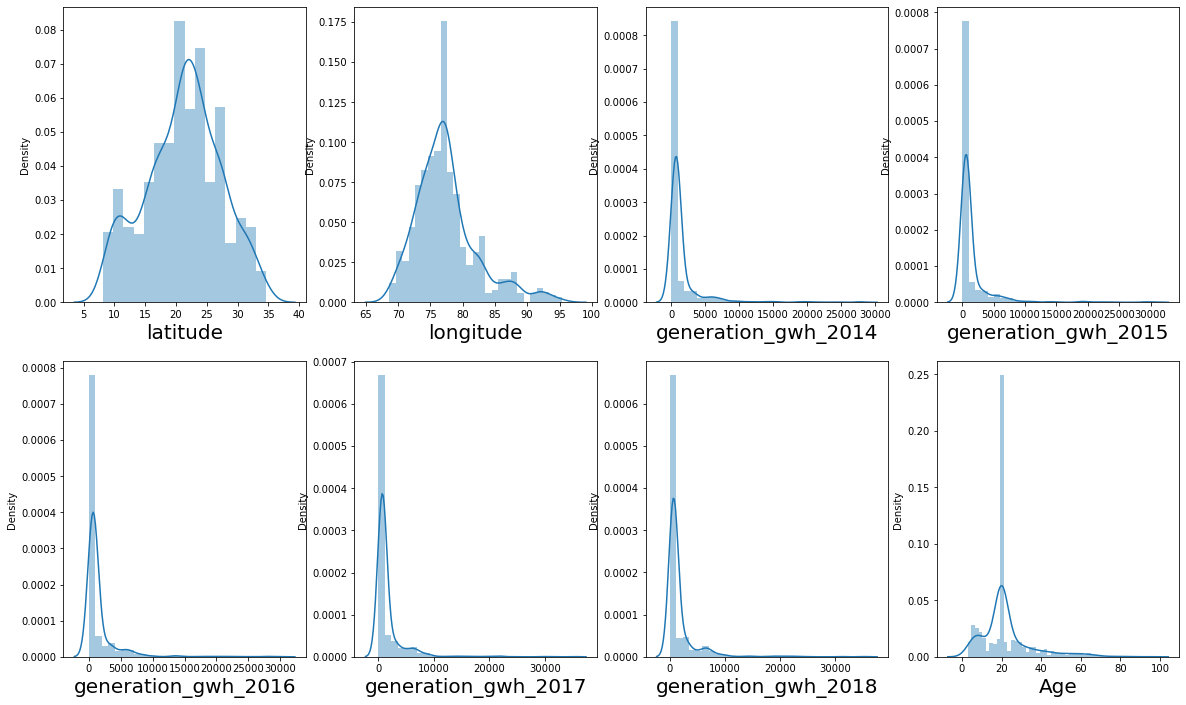

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(plant[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed

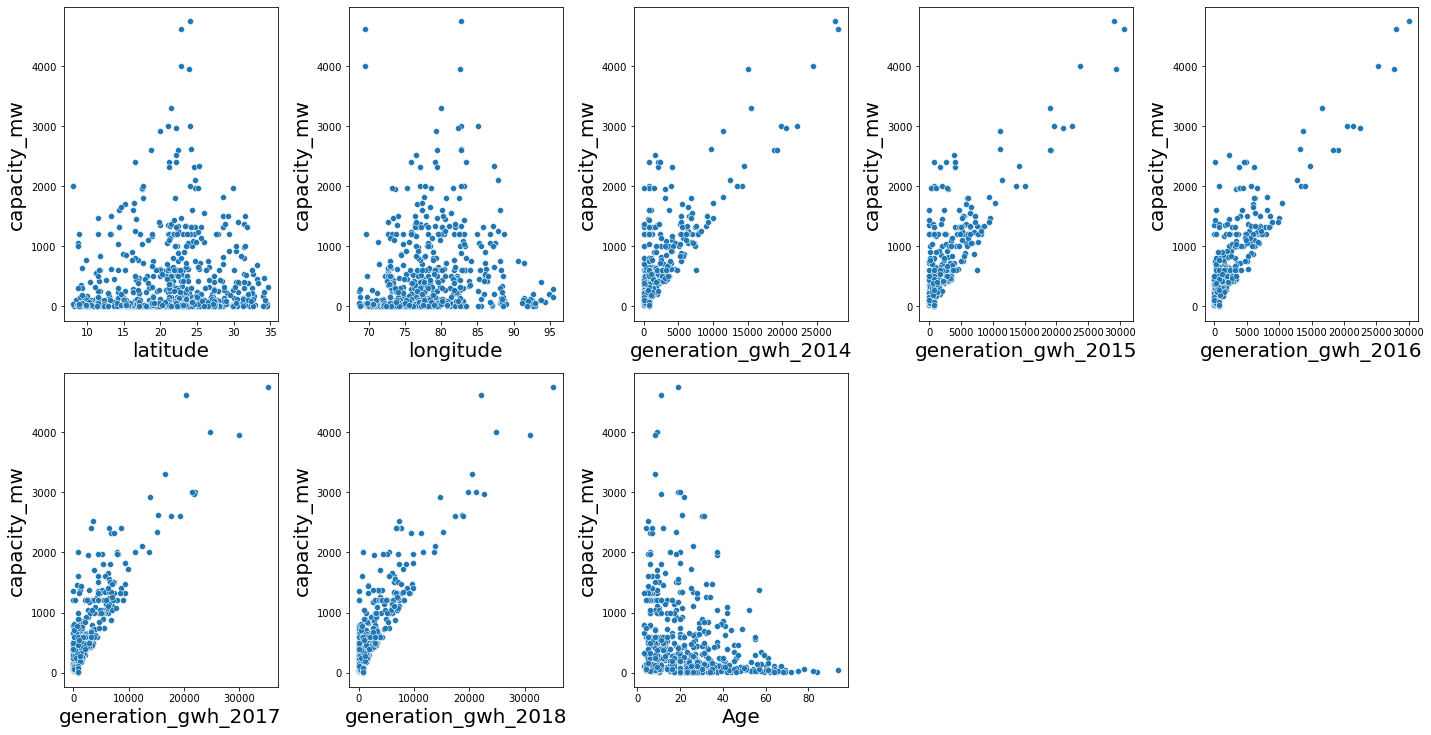

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = plant['capacity_mw']
X =  plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

 We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

<Figure size 432x432 with 0 Axes>

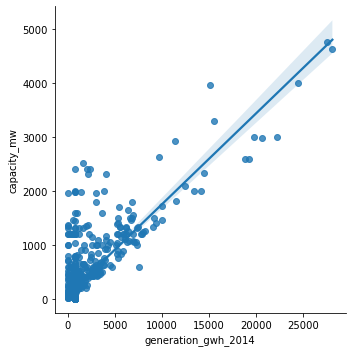

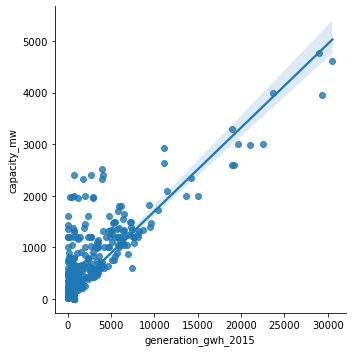

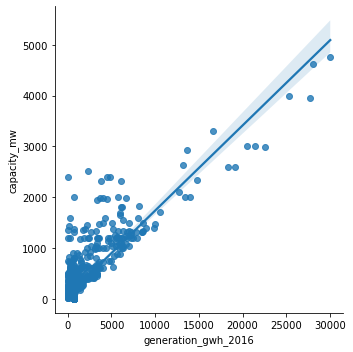

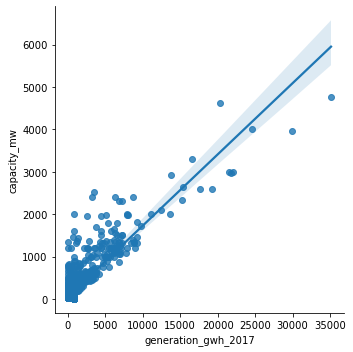

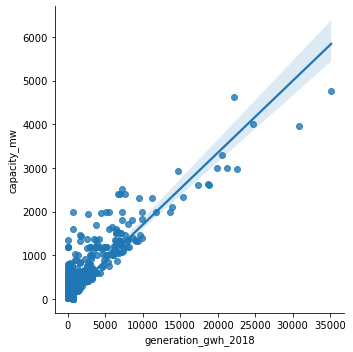

In [68]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = plant)

# capacity_mw vs categorical data type columns

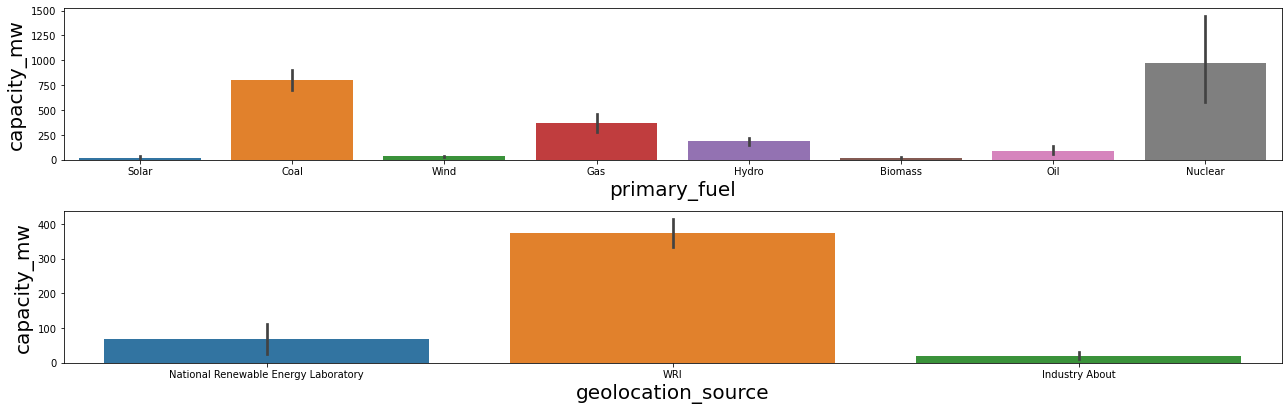

In [69]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = plant['capacity_mw']
X =  plant[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

# Analysing the categorical data type Target column

In [70]:
plant.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

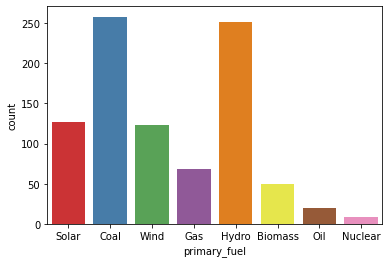

In [71]:
sns.countplot(plant['primary_fuel'], palette="Set1")

In [72]:
plant.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

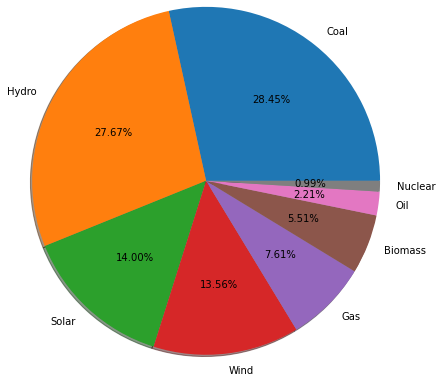

In [73]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(plant['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()

 Class:

'Coal' : Has 28.52% of total values

'Hydro' : Has 27.53% of total values

'Solar' : Has 13.99% of total values

'Wind' : Has 13.55% of total values

'Gas' : Has 7.60% of total values

'Biomass' : Has 5.51% of total values

'Oil' : Has 2.31% of total values

'Nuclear' : Has 0.99% of total values

Classes are imbalanced.

# primary_fuel' vs Continuous/Discrete Data Columns

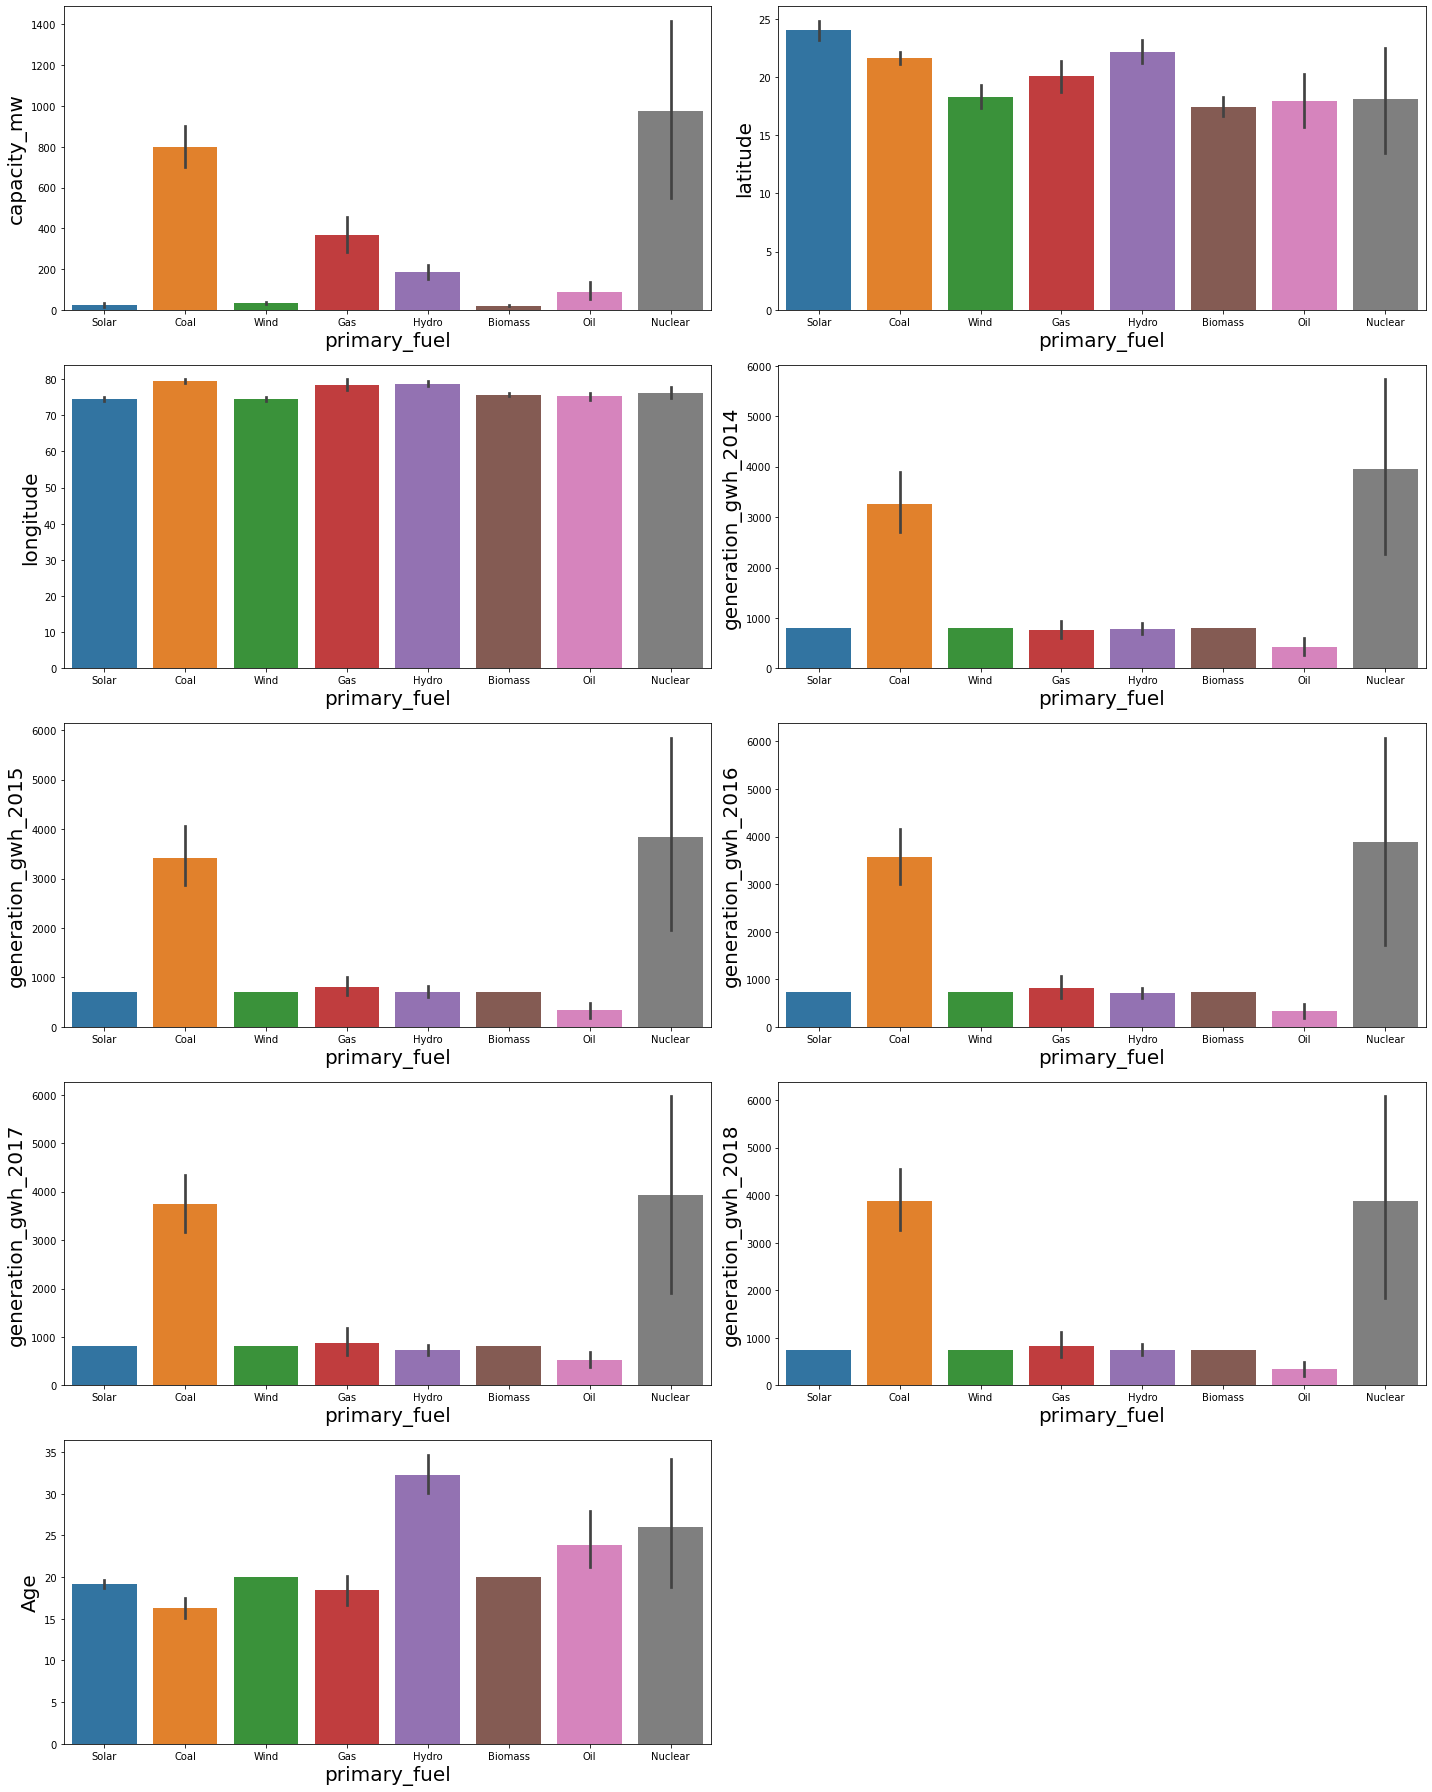

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = plant['primary_fuel']
X =  plant.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=15:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

 Following observations can be made from above graphs:

Highest power generation capacity belongs to Nuclear plants followed by Coal and then by Gas.

Hydro Power Plants have been running for the longest period.

While Power generation is the highest for Nuclear Plants, Power Generation has been on the rise for Coal power plants.

# 'primary_fuel' vs Categorical Data Columns

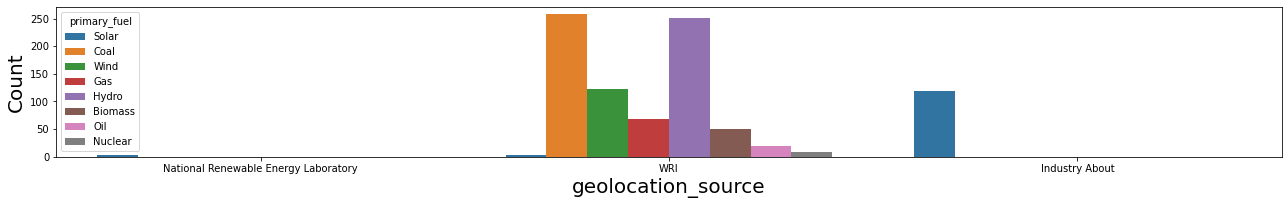

In [75]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = plant['primary_fuel']
X =  plant[['geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

 Most of the Geolocation Data is provided by WRI

# Checking for Outliers in columns with continuous distribution

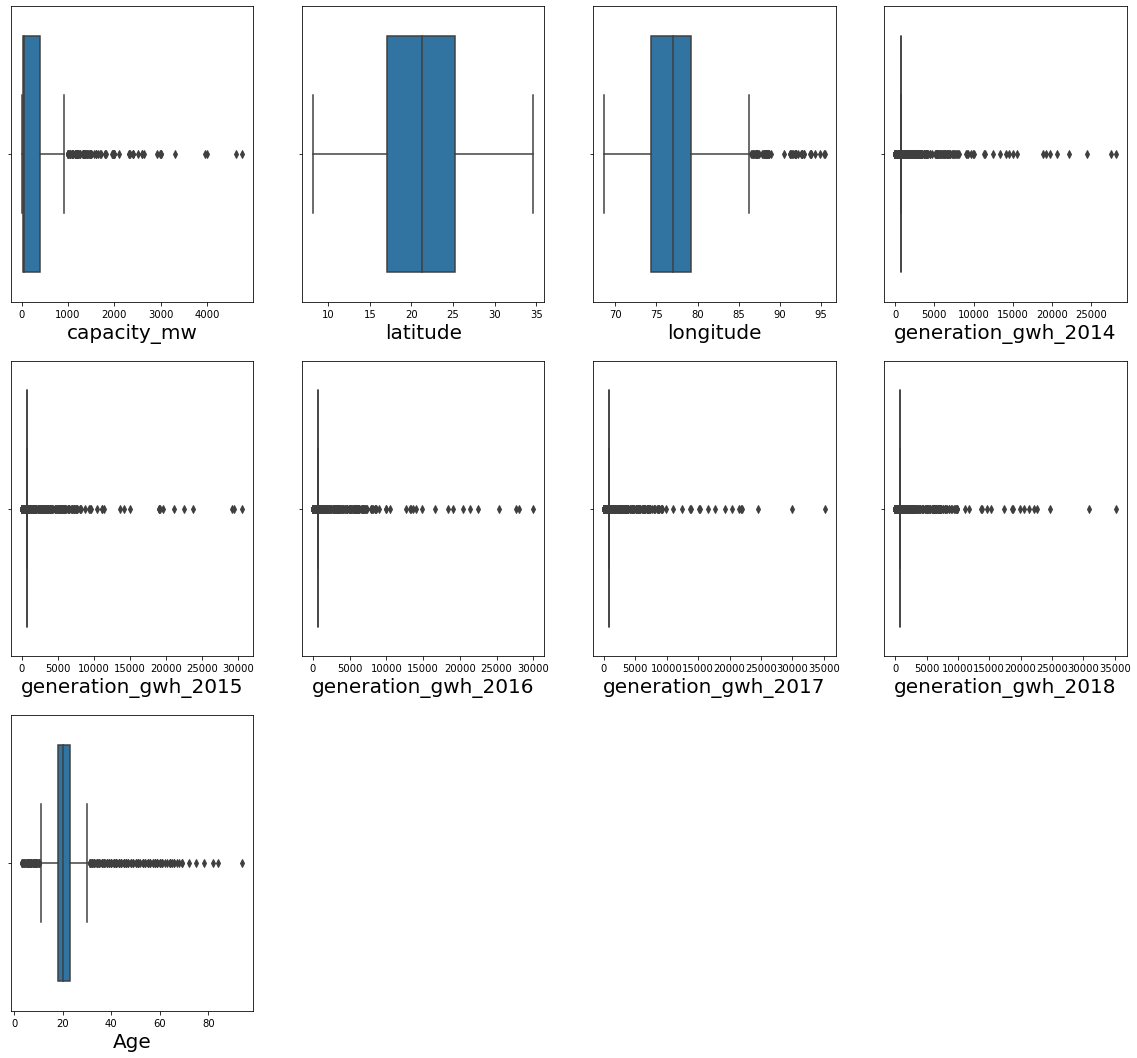

In [76]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = plant.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 All columns except latitude have a lot of outliers

In [77]:
df2 = plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [78]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [79]:
df3.shape

(851, 8)

In [80]:
df2.shape

(907, 8)

# % Data loss

In [81]:
loss=(908-852)/908 * 100
loss

6.167400881057269

 6.16% Data loss is within acceptable range

In [82]:
dropindx = plant.index.difference(df3.index)

In [83]:
plant.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [84]:
plant.shape

(851, 11)

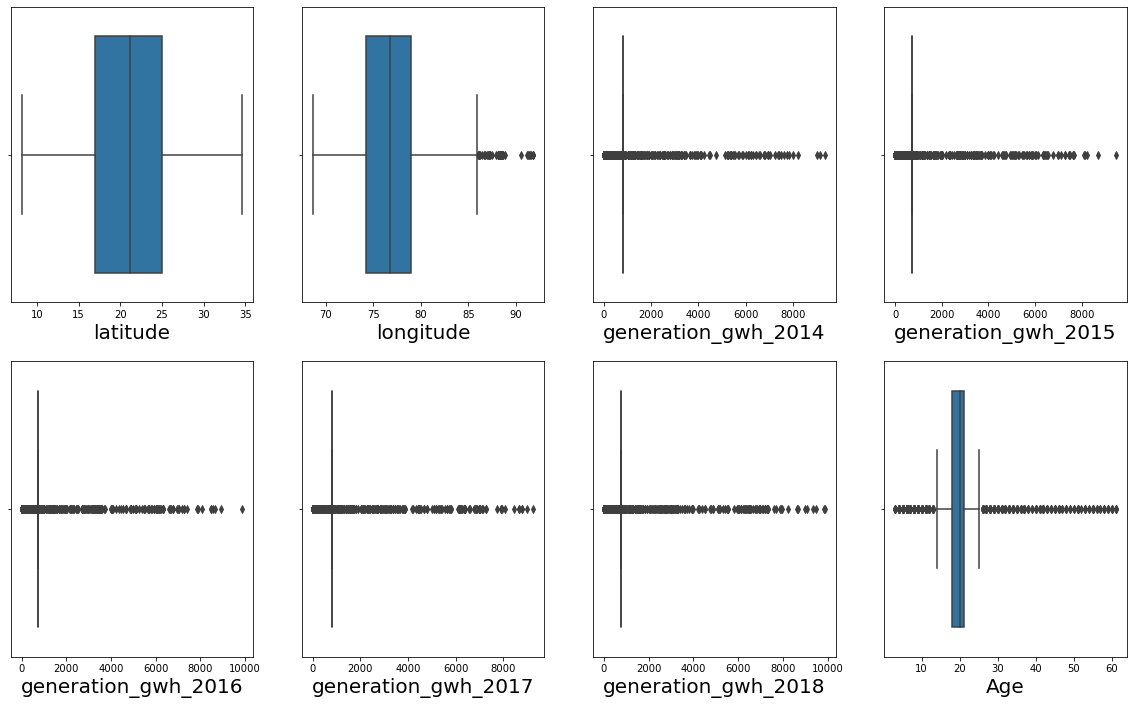

In [85]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

 Some outliers have been removed.

# Checking for Skewness in Data

In [86]:
plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.119551
longitude              0.918693
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Age                    1.280800
dtype: float64

 Skewness exists in all columns except latitude

# Reducing skewness further using PowerTransformer

In [87]:
from sklearn.preprocessing import PowerTransformer

In [88]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [89]:
df4 = plant.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [90]:
transformed= powtrans.fit_transform(df4)

In [91]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [92]:
transformed.skew()

latitude              -0.069485
longitude              0.000058
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Age                    0.026563
dtype: float64

Skewness has been greatly reduced

In [93]:
transformed.index = plant.index

In [94]:
plant[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age']]


In [95]:
plant

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,generation_gwh_2013
0,2.5,1.171257,-0.930084,Solar,National Renewable Energy Laboratory,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,-1.105732,-0.044061
1,98.0,0.596967,-0.511383,Coal,WRI,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061
2,39.2,0.120520,-2.364717,Wind,WRI,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061
3,135.0,0.447512,2.442641,Gas,WRI,0.093773,0.105691,-0.199692,-0.194159,626.239128,-0.248372,-0.268922
4,1800.0,0.129881,1.252442,Coal,WRI,2.286603,2.276671,1.983083,2.347272,7279.000000,-1.776648,1.426798
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,Coal,WRI,-2.461379,-0.842266,0.010837,-0.126054,686.500000,-1.983060,-0.044061
903,3.0,-1.345620,0.407395,Solar,Industry About,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061
904,25.5,-0.963692,-0.237493,Wind,WRI,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061
905,80.0,0.527406,-0.770182,Coal,WRI,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061


In [96]:
powrDF2 = plant.copy()

# Encoding using get_dummies()

In [97]:
dumm = pd.get_dummies(plant[['geolocation_source','primary_fuel']],drop_first = False)


In [98]:
powrDF2 = powrDF2.join(dumm)

In [99]:
powrDF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)
powrDF2

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,generation_gwh_2013,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.171257,-0.930084,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,-1.105732,-0.044061,...,1,0,0,0,0,0,0,0,1,0
1,98.0,0.596967,-0.511383,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,...,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120520,-2.364717,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,...,0,1,0,0,0,0,0,0,0,1
3,135.0,0.447512,2.442641,0.093773,0.105691,-0.199692,-0.194159,626.239128,-0.248372,-0.268922,...,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.129881,1.252442,2.286603,2.276671,1.983083,2.347272,7279.000000,-1.776648,1.426798,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,-2.461379,-0.842266,0.010837,-0.126054,686.500000,-1.983060,-0.044061,...,0,1,0,1,0,0,0,0,0,0
903,3.0,-1.345620,0.407395,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,...,0,0,0,0,0,0,0,0,1,0
904,25.5,-0.963692,-0.237493,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,...,0,1,0,0,0,0,0,0,0,1
905,80.0,0.527406,-0.770182,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,...,0,1,0,1,0,0,0,0,0,0


# Finding Correlation

In [100]:
t_corr = powrDF2.corr()
t_corr

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,generation_gwh_2013,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.050307,0.256838,0.519018,0.582540,0.603896,0.613179,0.815198,-0.331141,0.466805,...,-0.032010,0.234923,-0.143825,0.486687,0.063032,-0.101234,0.160586,-0.065498,-0.238330,-0.224380
latitude,0.050307,1.000000,-0.068115,0.100775,0.119213,0.100141,0.107471,0.063921,-0.106203,0.105999,...,0.073447,-0.207771,-0.151586,0.050766,-0.068712,0.099203,-0.050742,-0.082142,0.205059,-0.192004
longitude,0.256838,-0.068115,1.000000,0.033772,0.089248,0.076899,0.098191,0.198181,-0.144126,0.033177,...,-0.085886,0.306214,-0.058114,0.326970,0.007780,0.158658,-0.014544,-0.059282,-0.298920,-0.250225
generation_gwh_2014,0.519018,0.100775,0.033772,1.000000,0.880793,0.771584,0.770922,0.684498,-0.105553,0.840179,...,-0.003377,0.020103,-0.012278,0.337284,-0.100538,-0.207007,0.116196,-0.189257,-0.020486,-0.020199
generation_gwh_2015,0.582540,0.119213,0.089248,0.880793,1.000000,0.895963,0.885985,0.776509,-0.192430,0.783428,...,-0.003168,0.018860,-0.011519,0.387673,-0.146404,-0.219149,0.082791,-0.207532,-0.019220,-0.018950
generation_gwh_2016,0.603896,0.100141,0.076899,0.771584,0.895963,1.000000,0.935698,0.822847,-0.172890,0.712174,...,-0.002421,0.014410,-0.008801,0.386078,-0.158242,-0.242864,0.080530,-0.137212,-0.014685,-0.014479
generation_gwh_2017,0.613179,0.107471,0.098191,0.770922,0.885985,0.935698,1.000000,0.848848,-0.182809,0.714425,...,-0.003930,0.023392,-0.014286,0.380754,-0.174140,-0.188669,0.097367,-0.210643,-0.023838,-0.023504
generation_gwh_2018,0.815198,0.063921,0.198181,0.684498,0.776509,0.822847,0.848848,1.000000,-0.264856,0.618383,...,-0.022360,0.133109,-0.081294,0.477545,-0.081014,-0.184164,0.149153,-0.086649,-0.135646,-0.133745
Age,-0.331141,-0.106203,-0.144126,-0.105553,-0.192430,-0.172890,-0.182809,-0.264856,1.000000,-0.041357,...,-0.094959,-0.001485,0.012640,-0.340585,-0.070923,0.356023,0.043135,0.053461,-0.019613,0.020796
generation_gwh_2013,0.466805,0.105999,0.033177,0.840179,0.783428,0.712174,0.714425,0.618383,-0.041357,1.000000,...,-0.003028,0.018025,-0.011008,0.328479,-0.163067,-0.181090,0.157903,-0.168384,-0.018368,-0.018111


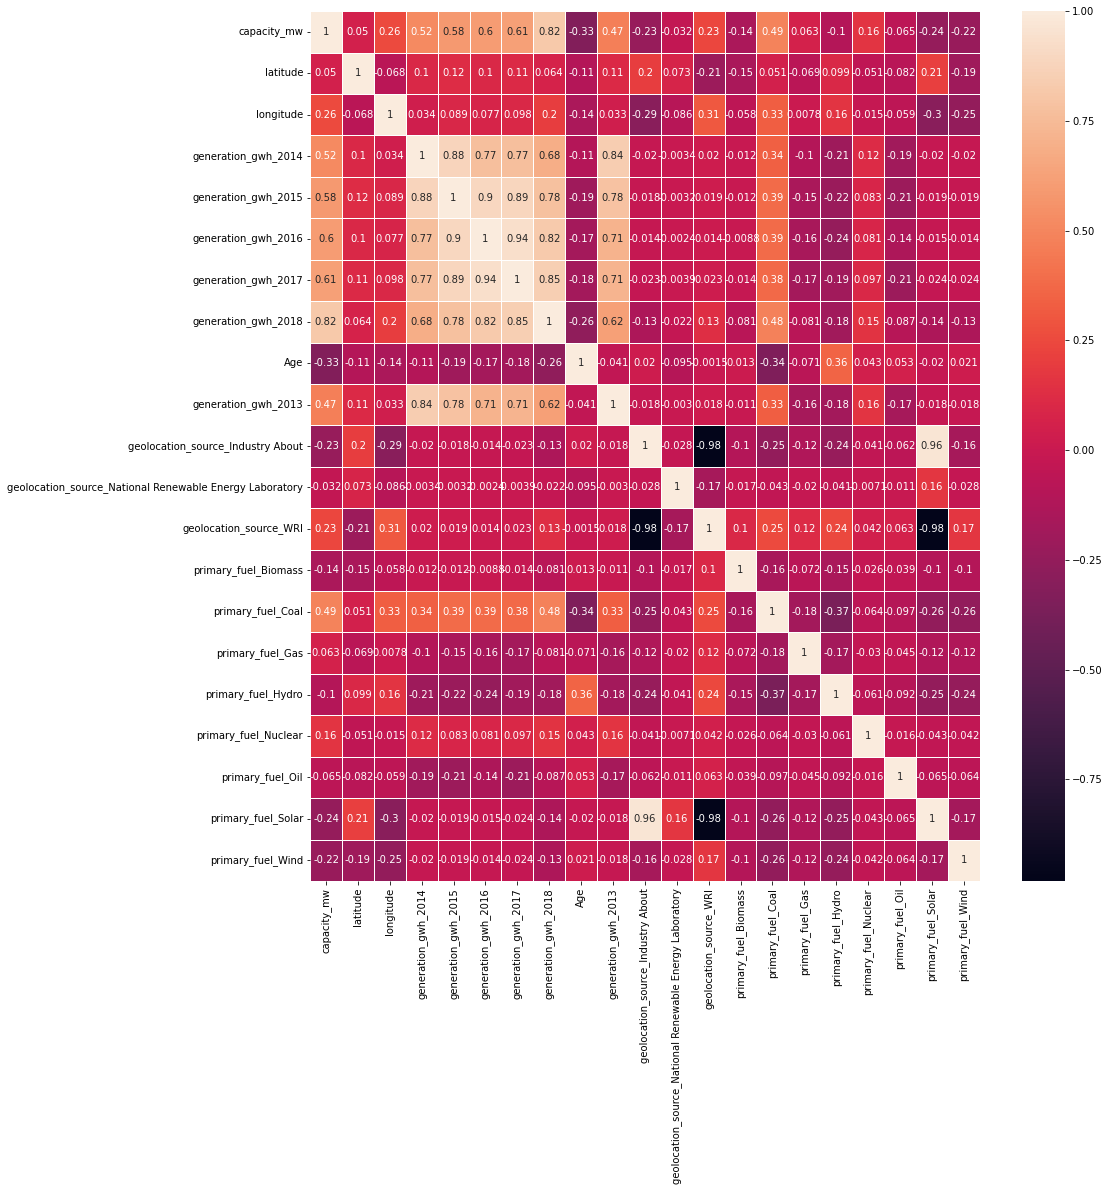

In [101]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

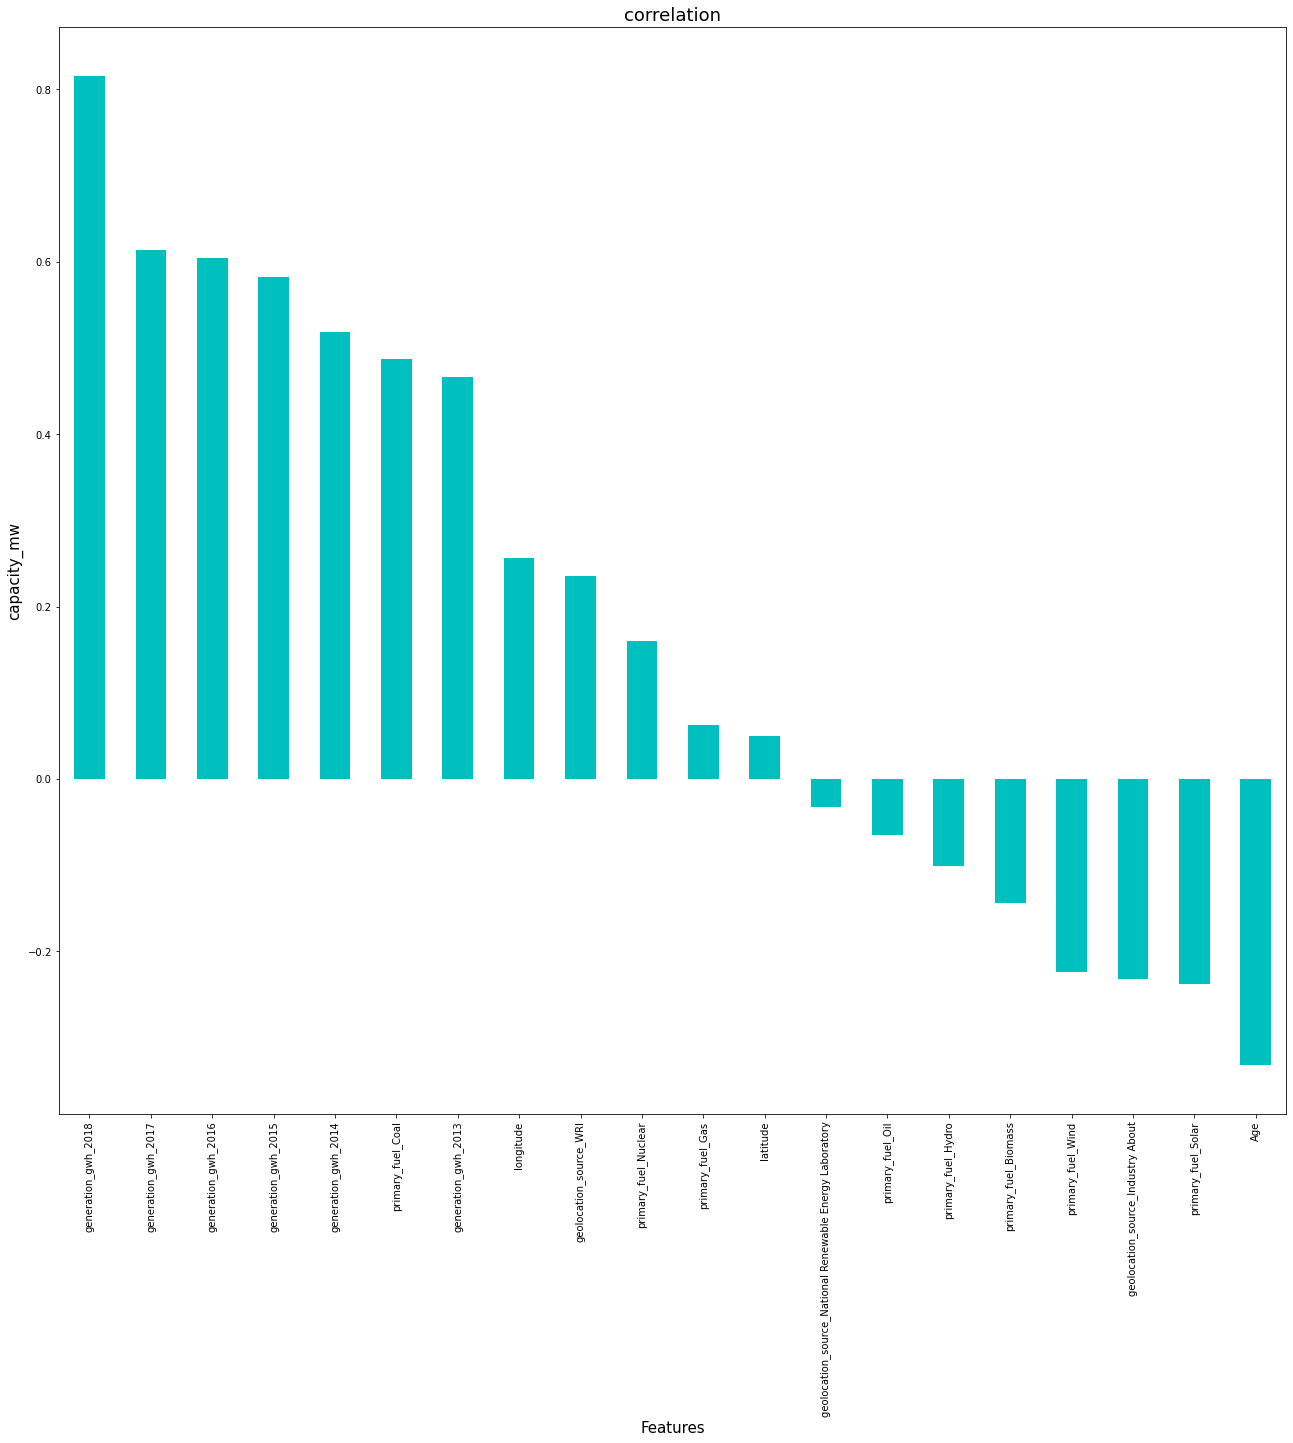

In [102]:
plt.figure(figsize = (22,20))
powrDF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw

# Feature Selection

In [103]:
from sklearn.preprocessing import StandardScaler
X = powrDF2.drop(columns = ['capacity_mw'])
y = powrDF2['capacity_mw']
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [105]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif.head(10)

,Features,vif
0,latitude,1.192492
1,longitude,1.370394
2,generation_gwh_2014,6.293206
3,generation_gwh_2015,10.112800
4,generation_gwh_2016,10.619867
5,generation_gwh_2017,11.303225
6,generation_gwh_2018,4.907548
7,Age,1.429030
8,generation_gwh_2013,3.739144
9,geolocation_source_Industry About,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016

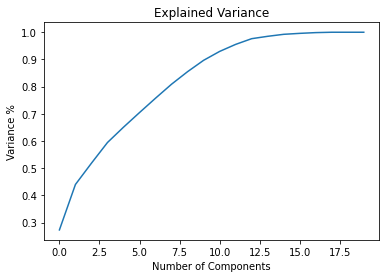

In [106]:
from sklearn.decomposition import PCA
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

15 components explain around 95% variance in Data

# Selecting Kbest Features

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [108]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(19,'Score'))

                              Feature      Score
6                 generation_gwh_2018  10.752621
14                   primary_fuel_Gas   5.619707
5                 generation_gwh_2017   4.794625
4                 generation_gwh_2016   4.641176
3                 generation_gwh_2015   4.269304
16               primary_fuel_Nuclear   3.637388
19                  primary_fuel_Wind   3.564033
8                 generation_gwh_2013   3.393717
9   geolocation_source_Industry About   3.385337
11             geolocation_source_WRI   3.265825
18                 primary_fuel_Solar   3.197604
2                 generation_gwh_2014   3.143672
13                  primary_fuel_Coal   3.143098
17                   primary_fuel_Oil   2.457972
7                                 Age   2.108357
15                 primary_fuel_Hydro   1.997915
1                           longitude   1.712080
0                            latitude   1.417108
12               primary_fuel_Biomass   1.313222


# Dropping highly multicollinear column: 'generation_gwh_2016'.

In [109]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()
scaled_x_best = scaler.fit_transform(x_best)

# Regression Model Building

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Finding the Best Random State

In [111]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8352362089277893 on random_state: 11


In [112]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =7)

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [114]:
from sklearn.metrics import r2_score,mean_squared_error
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
SV= SVR()
r=Ridge()

# Training the Models

In [115]:
rf.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

# Ridge Regression Model

In [116]:
y_r_pred = r.predict(x_test)
r2_score(y_test,y_r_pred)

0.7232321052056783

In [117]:
mean_squared_error(y_test,y_r_pred)

48851.93478285806

In [118]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

221.02473794319508

# Random Forest Regression Model

In [119]:
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)

0.7995382466384964

In [120]:
mean_squared_error(y_test,y_rf_pred)

35383.238756616316

In [121]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

188.1043294467629

# Support Vector Regression Model

In [122]:
y_svr_pred = SV.predict(x_test)
r2_score(y_test,y_svr_pred)

-0.15452641363698993

In [123]:
mean_squared_error(y_test,y_svr_pred)

203783.92915115817

In [124]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

451.42433380485613

# Decision Tree Regression Model

In [125]:
y_dt_pred = dt.predict(x_test)
r2_score(y_test,y_dt_pred)

0.5923346271635352

In [126]:
mean_squared_error(y_test,y_dt_pred)

71956.47537745076

In [127]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

268.2470416937543

# Model Cross Validation

In [128]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Ridge Regression

In [129]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.7147280595988337

# Random Forest Regression

In [130]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.773423788678983

# SV Regression

In [131]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.14034476214177696

# Decision Tree Regression

In [132]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.5689637198198876

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

# Random Forest Regressor

In [133]:
parameter = {'n_estimators':[30,60,80,100],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}


In [134]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [135]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80, 100]},
             verbose=1)

In [136]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [137]:
Best_mod1 = RandomForestRegressor(n_estimators = 100,criterion = 'mse', max_depth= 20, max_features = 'sqrt',min_samples_leaf = 5, min_samples_split = 10)


In [138]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10)

In [139]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

83.89071972408182


### observe :
Random Forest Regressor has an accuracy of 83.89%

# Saving The Model

In [141]:
import joblib
joblib.dump(Best_mod1,"BestModelpowercapacity.pkl")

['BestModelpowercapacity.pkl']

# Loading The Model

In [142]:
mod=joblib.load("BestModelpowercapacity.pkl")
print(mod.predict(x_test))

[  48.39515355   94.42882804   25.11454015   85.79256913  364.37865683
  111.18623751   20.32969804  267.13453413  202.45466127  205.08486009
   20.96826046  868.10215338  103.44889762   68.37995917  827.43825877
   72.06074731   40.64231903   24.43007285   39.08187414 1351.18641493
  316.70023229   28.05018032   16.46517167  131.47854821  117.48367467
  385.24863879  353.84014353   73.41140152   93.37726617   27.93720539
  621.3372175    26.10489916   27.12568305   27.07459558  234.83763321
  947.72103871   31.518079    647.75292514  185.27724476   78.24912489
   22.63709508  101.23673759  105.23949793 1153.21103013   83.30029095
  789.28310763   93.51705559  511.63671324 1382.49444453  227.75848886
   23.4193936   199.56509683   27.72474484   69.507651     62.3826677
   27.14343034  601.07313552   39.21395074  710.99535042  124.97317614
  368.24334402  188.65424014   28.39563648   36.52239717   29.62558221
   30.26903679   36.4942202    79.8759177   639.74043526   44.75860817
  179.9

In [143]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(20)

,Predictions,Actual Values
362,48.395154,12.00
450,94.428828,15.00
338,25.114540,16.00
211,85.792569,4.25
868,364.378657,187.20
292,111.186238,155.00
402,20.329698,20.00
598,267.134534,120.00
339,202.454661,90.00
148,205.084860,240.00


# Encoding using get_dummies()

In [147]:
dumm = pd.get_dummies(plant[['geolocation_source']],drop_first = False)
plant = plant.join(dumm)
plant.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

# Encoding the Label Column.

 Encoding the categorical data using Label Encoding Technique

In [150]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
plant['primary_fuel'] = labenc.fit_transform(plant['primary_fuel'])
plant

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,generation_gwh_2013,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.171257,-0.930084,6,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,-1.105732,-0.044061,0,1,0
1,98.0,0.596967,-0.511383,1,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,0,0,1
2,39.2,0.120520,-2.364717,7,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,0,0,1
3,135.0,0.447512,2.442641,2,0.093773,0.105691,-0.199692,-0.194159,626.239128,-0.248372,-0.268922,0,0,1
4,1800.0,0.129881,1.252442,1,2.286603,2.276671,1.983083,2.347272,7279.000000,-1.776648,1.426798,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,1,-2.461379,-0.842266,0.010837,-0.126054,686.500000,-1.983060,-0.044061,0,0,1
903,3.0,-1.345620,0.407395,6,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,1,0,0
904,25.5,-0.963692,-0.237493,7,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,0,0,1
905,80.0,0.527406,-0.770182,1,-0.049141,-0.046103,-0.035226,-0.057181,751.644375,0.050594,-0.044061,0,0,1


# Finding Correlation

In [152]:
c_corr = plant.corr()
c_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,generation_gwh_2013,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.050307,0.256838,-0.398039,0.519018,0.582540,0.603896,0.613179,0.815198,-0.331141,0.466805,-0.231883,-0.032010,0.234923
latitude,0.050307,1.000000,-0.068115,-0.000873,0.100775,0.119213,0.100141,0.107471,0.063921,-0.106203,0.105999,0.196149,0.073447,-0.207771
longitude,0.256838,-0.068115,1.000000,-0.406369,0.033772,0.089248,0.076899,0.098191,0.198181,-0.144126,0.033177,-0.293512,-0.085886,0.306214
primary_fuel,-0.398039,-0.000873,-0.406369,1.000000,-0.156228,-0.173195,-0.158198,-0.171149,-0.298364,0.148275,-0.139275,0.471644,0.080782,-0.480885
generation_gwh_2014,0.519018,0.100775,0.033772,-0.156228,1.000000,0.880793,0.771584,0.770922,0.684498,-0.105553,0.840179,-0.019717,-0.003377,0.020103
generation_gwh_2015,0.582540,0.119213,0.089248,-0.173195,0.880793,1.000000,0.895963,0.885985,0.776509,-0.192430,0.783428,-0.018498,-0.003168,0.018860
generation_gwh_2016,0.603896,0.100141,0.076899,-0.158198,0.771584,0.895963,1.000000,0.935698,0.822847,-0.172890,0.712174,-0.014133,-0.002421,0.014410
generation_gwh_2017,0.613179,0.107471,0.098191,-0.171149,0.770922,0.885985,0.935698,1.000000,0.848848,-0.182809,0.714425,-0.022942,-0.003930,0.023392
generation_gwh_2018,0.815198,0.063921,0.198181,-0.298364,0.684498,0.776509,0.822847,0.848848,1.000000,-0.264856,0.618383,-0.130551,-0.022360,0.133109
Age,-0.331141,-0.106203,-0.144126,0.148275,-0.105553,-0.192430,-0.172890,-0.182809,-0.264856,1.000000,-0.041357,0.020299,-0.094959,-0.001485


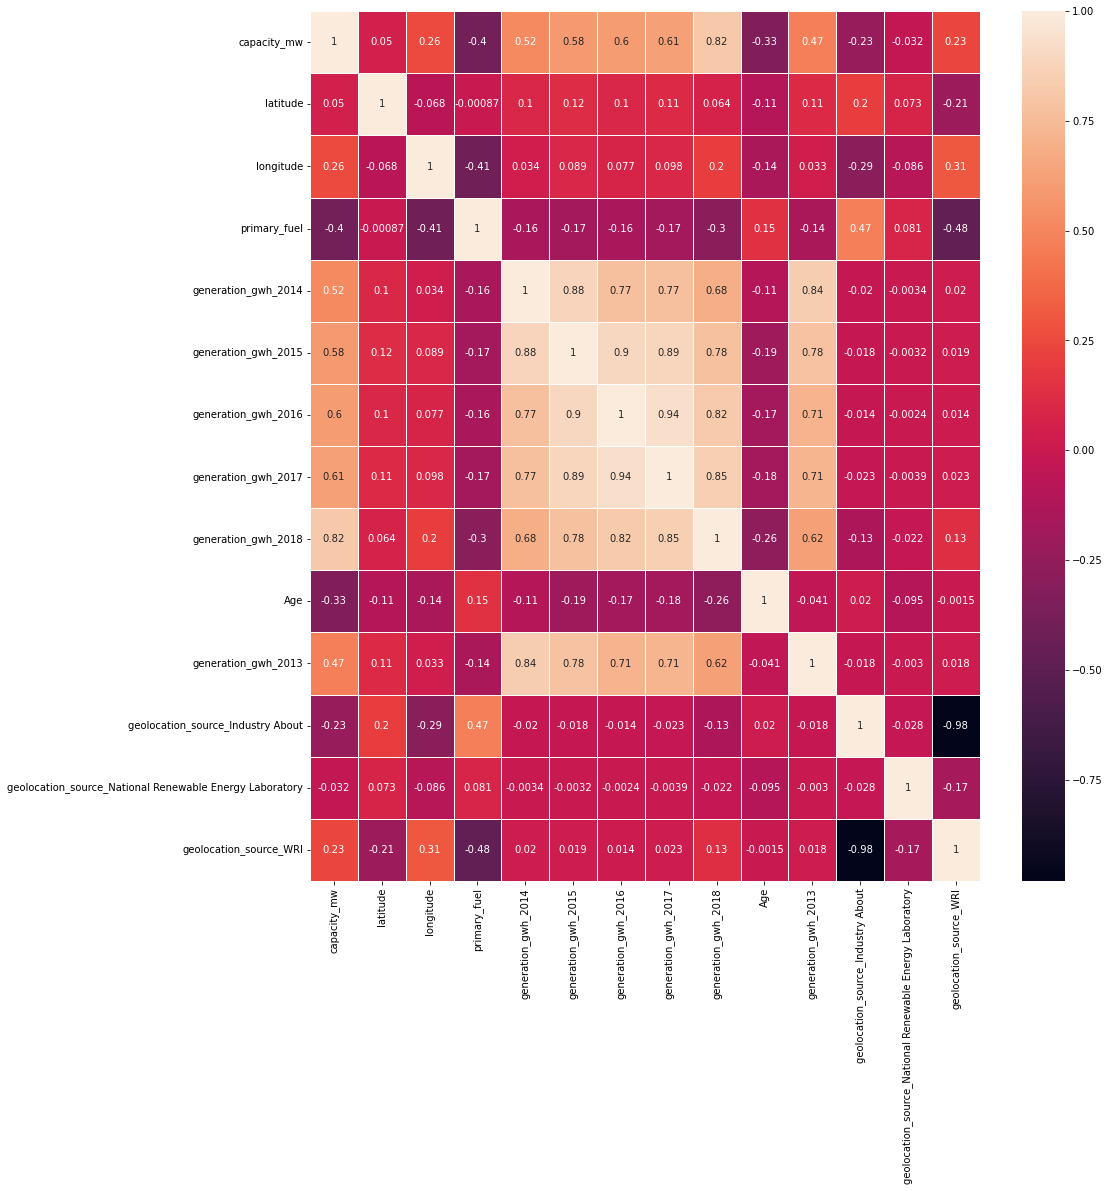

In [153]:
plt.figure(figsize=(15,16))
sns.heatmap(c_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

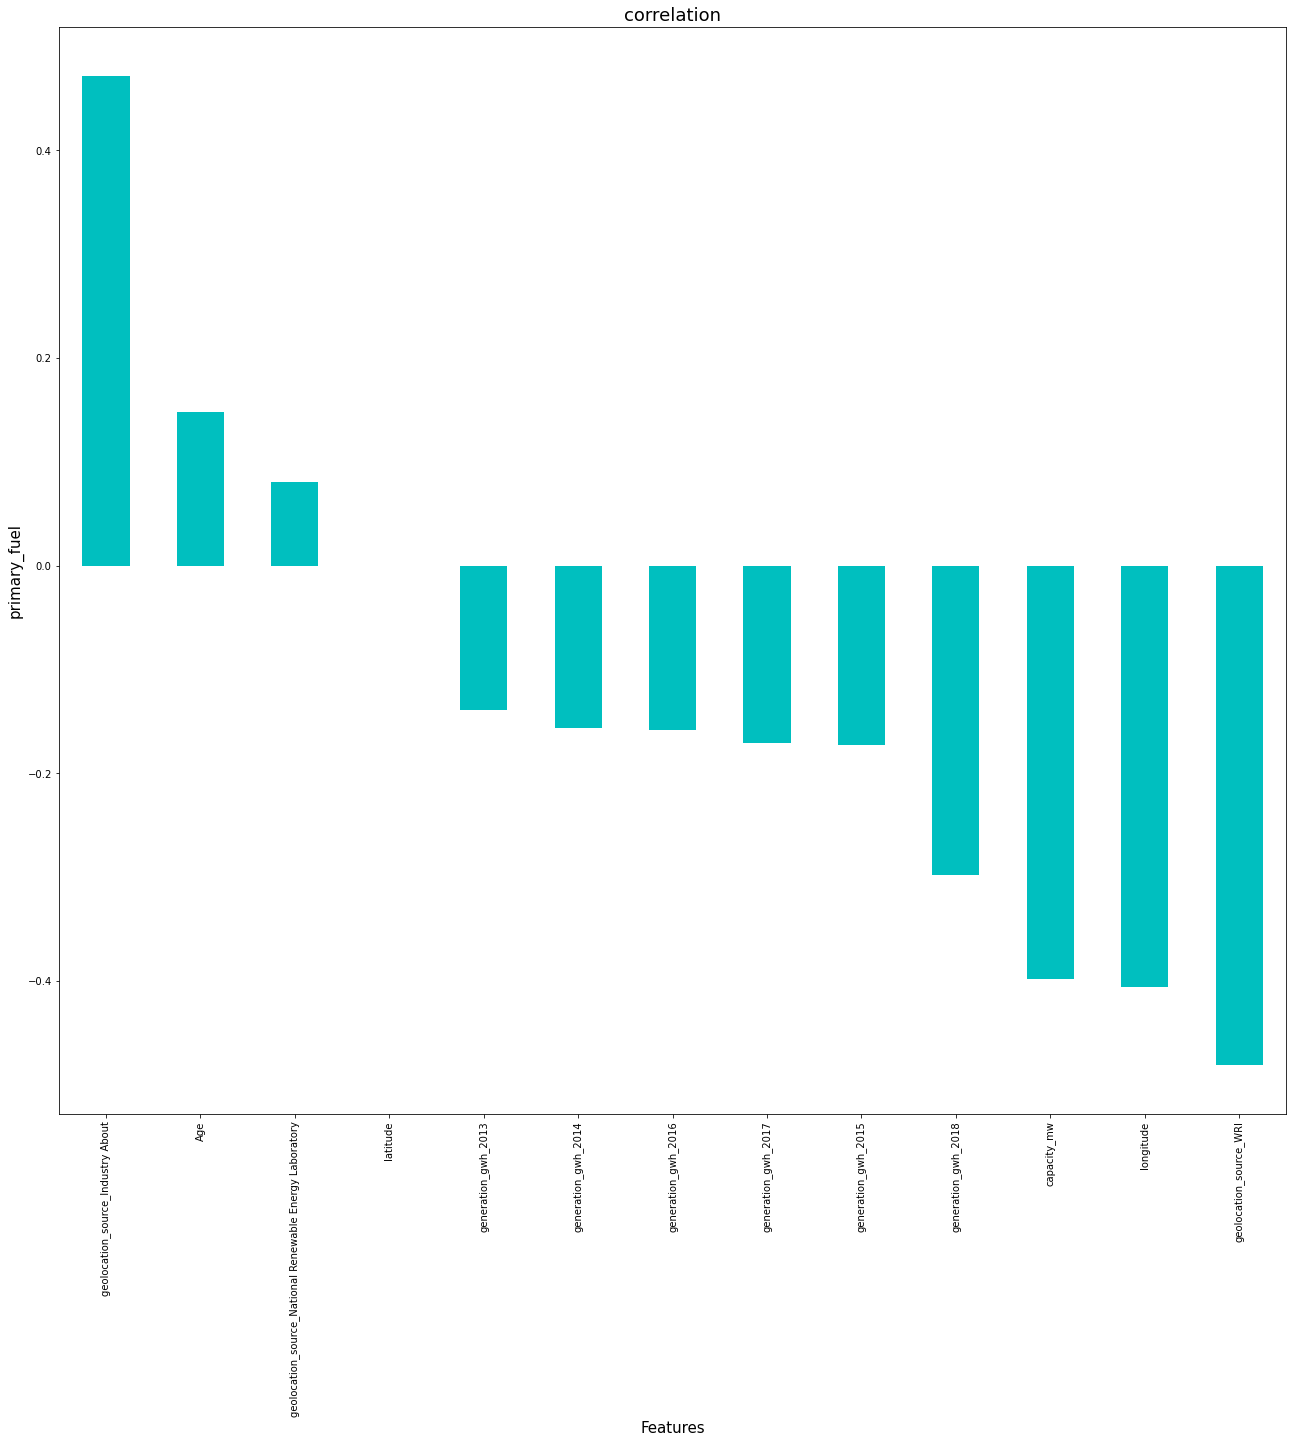

In [156]:
plt.figure(figsize = (22,20))
plant.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

#geolocation_source_Industry About has the highest positive correlation followed by Age,Geolocation_source_WRI,longitude and capacity_mw have the highest negative correlation with primary_fuel

In [158]:
X = plant.drop(columns = ['primary_fuel'])
y = plant['primary_fuel']

# Feature Selection

In [159]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif.head(10)

,Features,vif
0,capacity_mw,3.500739
1,latitude,1.077401
2,longitude,1.184541
3,generation_gwh_2014,6.216531
4,generation_gwh_2015,9.988211
5,generation_gwh_2016,9.993507
6,generation_gwh_2017,10.623988
7,generation_gwh_2018,7.290265
8,Age,1.213277
9,generation_gwh_2013,3.618769


# Principle Component Analysis

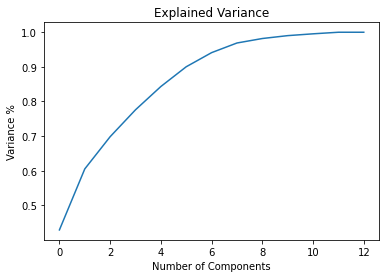

In [161]:
from sklearn.decomposition import PCA
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

# Selecting Kbest Features

In [162]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [163]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
12                             geolocation_source_WRI  3129.232416
10                  geolocation_source_Industry About  1513.317316
0                                         capacity_mw    57.331958
7                                 generation_gwh_2018    42.758684
2                                           longitude    36.427739
4                                 generation_gwh_2015    32.642821
6                                 generation_gwh_2017    32.533027
5                                 generation_gwh_2016    30.007242
8                                                 Age    27.821737
9                                 generation_gwh_2013    26.370400
3                                 generation_gwh_2014    25.058486
1                                            latitude    15.134116
11  geolocation_source_National Renewable Energy L...     3.363862
